# Exercises I
Let's review the steps we take at the beginning of each new module.

1. Create a new repository named ```regression-exercises``` in your GitHub; all of your Regression work will be housed here.
1. Clone this repository within your local ```codeup-data-science``` directory.
1. Create a .gitignore and make sure your list of 'files to ignore' includes your ```env.py``` file.
1. Create a ```README.md``` file that outlines the contents and purpose of your repository.
1. Add, commit, and push these two files.
1. Now you can add your env.py file to this repository to access the Codeup database server.
1. For these exercises, you will create ```wrangle.ipynb``` and ```wrangle.py``` files to hold necessary functions.
1. As always, add, commit, and push your work often.


# Exercises II

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

import warnings
warnings.filterwarnings("ignore")

import wrangle as w

### 1. Acquire ```bedroomcnt```, ```bathroomcnt```, ```calculatedfinishedsquarefeet```, ```taxvaluedollarcnt```, ```yearbuilt```, ```taxamount```, and ```fips``` from the ```zillow``` database for all 'Single Family Residential' properties.


In [2]:
def new_zillow_data():
    '''
    This reads the zillow 2017 properties data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = '''
                SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
                FROM properties_2017
                WHERE propertylandusetypeid IN ("261", "279");
                '''
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, w.get_db_url(db = 'zillow'))
    
    return df

In [3]:
def aquire_zillow_data(new = False):
    ''' 
    Aquires data for 2017 properties
    '''
    
    filename = 'zillow.csv'
    
    #if we don't have cached data or we want to get new data go get it from server
    if (os.path.isfile(filename) == False) or (new == True):
        df = new_zillow_data()
        #save as csv
        df.to_csv(filename,index=False)

    #else used cached data
    else:
        df = pd.read_csv(filename)
          
    return df

In [4]:
#acquire data
zillow = w.aquire_zillow_data()

In [5]:
zillow.shape

(2152863, 7)

### 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your ```wrangle.ipynb``` file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

## Examine data frame

In [6]:
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [7]:
zillow.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [8]:
#make column names more human readable
zillow = zillow.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'square_feet',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built'})

In [9]:
#statistical analysis of data
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathrooms,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
square_feet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
tax_value,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
year_built,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [10]:
#check for nulls in each column
zillow.isnull().sum()

bedrooms         11
bathrooms        11
square_feet    8484
tax_value       493
year_built     9337
taxamount      4442
fips              0
dtype: int64

**Thoughts**
- Need to figure out what to do with these NULLs
- And check if fips is no NULLs or just white space

In [11]:
#check to see what values exist in the fips column
zillow.fips.value_counts(dropna=False, ascending=True)

6111.0     165975
6059.0     555077
6037.0    1431811
Name: fips, dtype: int64

In [12]:
zillow_dropna = zillow.dropna()

### Let's explore the data before we make any decisions

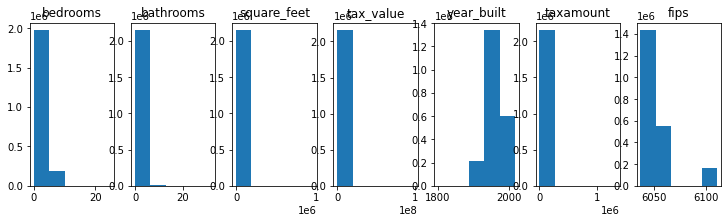

In [13]:
plt.figure(figsize=(16, 3))

# List of columns
cols = zillow.columns.to_list()

for i, col in enumerate(cols):

    # i starts at 0, but plot numbers should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,9, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)


All of the data seems skewed

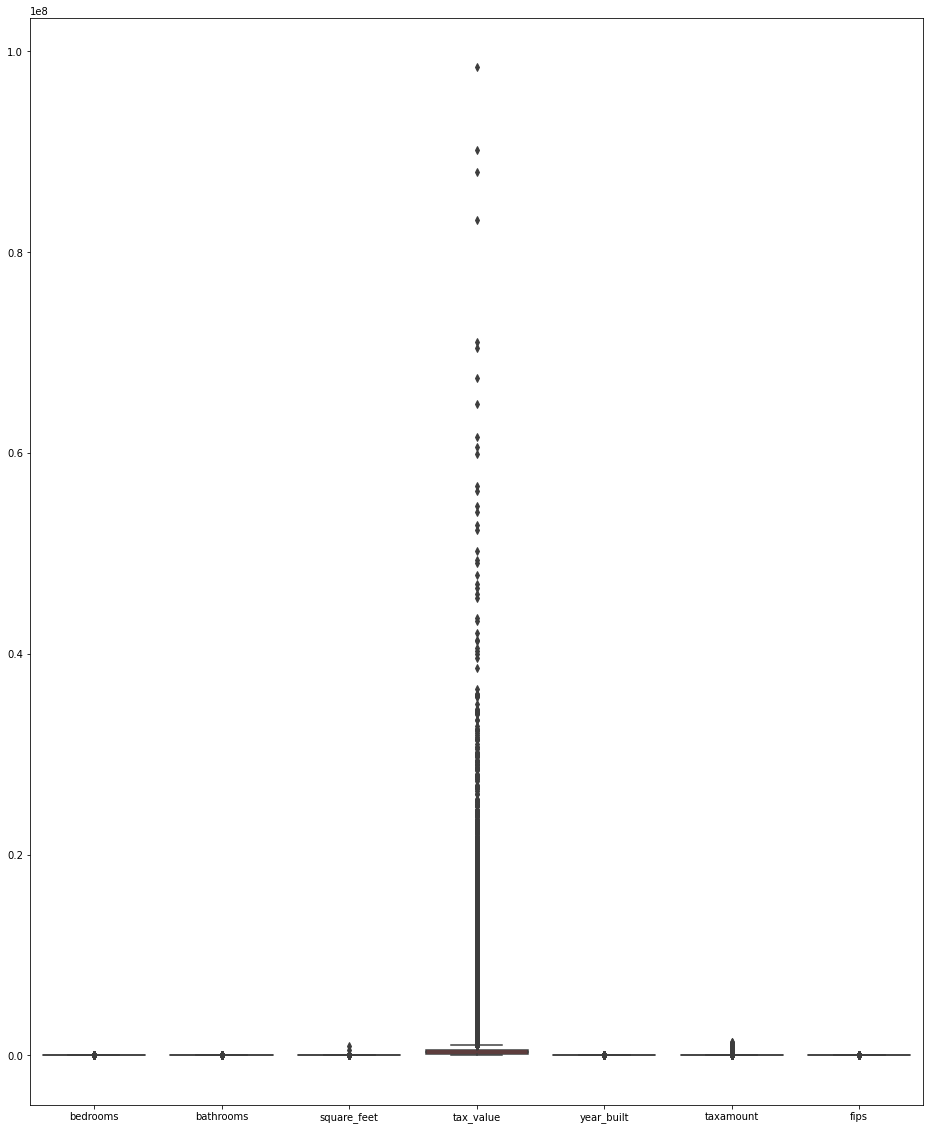

In [14]:
# Create boxplots for all the data
plt.figure(figsize=(16, 20))
sns.boxplot(data=zillow)
plt.show()

***DANG!*** There are some crazy outliers in ```tax_value```

In [15]:
# Look at the statistics again
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathrooms,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
square_feet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
tax_value,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
year_built,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


**Thoughts**
- obvious outliers in ```tax_value``` and ```taxamount```
- also looks like ```bedrooms``` and ```bathrooms``` has a few outliers as well 25 bedrooms??? 32 bathrooms???
- maybe a few outliers in ```square_feet```
- What should we do?!?!?

## Let's remove some outliers!

After some googling I saw a way to remove outliers with a cool function. (See below)

In [16]:
def remove_outliers(df, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + 1.5 * iqr   # get upper bound
        lower_bound = q1 - 1.5 * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [17]:
remove = remove_outliers(zillow, ['tax_value', 'taxamount', 'bedrooms', 
                                       'bathrooms', 'square_feet'])

**After running this and compared my numbers with Cristina I realized the order or the features matters**
- It will remove fewer if you start with those columns that have fewer outliers.

In [18]:
remove1 = remove_outliers(zillow, ['bedrooms','bathrooms','square_feet', 
                                   'tax_value', 'taxamount'])

In [19]:
zillow.shape, zillow_dropna.shape, remove.shape, remove1.shape

((2152863, 7), (2140235, 7), (1423123, 7), (1855285, 7))

```zillow_dropna``` has the fewest removed rows, but we might need to remove those outliers to help the future model.

Let's look at the what columns still have nulls after removing outliers ('bedrooms','bathrooms','square_feet', 'tax_value', 'taxamount') ```remove1```

In [20]:
#check for nulls in each column
remove1.isnull().sum()

bedrooms         0
bathrooms        0
square_feet      0
tax_value        0
year_built     874
taxamount        0
fips             0
dtype: int64

Still have some NULLs.... Should I impute or drop?

In [21]:
remove1.year_built.value_counts()

1955.0    80451
1950.0    66876
1954.0    65523
1953.0    58746
1956.0    58054
          ...  
1823.0        1
1801.0        1
1807.0        1
1877.0        1
1874.0        1
Name: year_built, Length: 152, dtype: int64

**No obvious year that stands out as a very common year. I will just drop them.**

In [22]:
remove1 = remove1.dropna()

In [23]:
remove1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854411 entries, 6 to 2152862
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedrooms     1854411 non-null  float64
 1   bathrooms    1854411 non-null  float64
 2   square_feet  1854411 non-null  float64
 3   tax_value    1854411 non-null  float64
 4   year_built   1854411 non-null  float64
 5   taxamount    1854411 non-null  float64
 6   fips         1854411 non-null  float64
dtypes: float64(7)
memory usage: 113.2 MB


**All NULLs removed**

Let's plot the data to see what it looks like now.

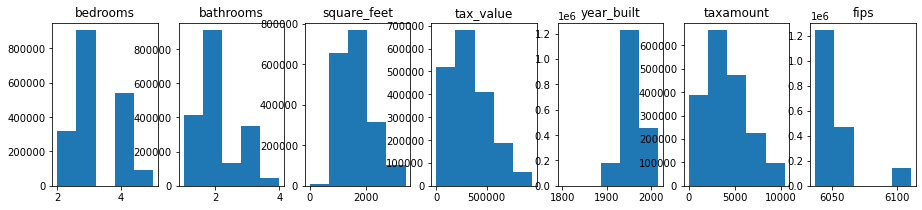

In [24]:
plt.figure(figsize=(20, 3))

# List of columns
cols = remove1.columns.to_list()

for i, col in enumerate(cols):

    # i starts at 0, but plot numbers should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,9, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    remove1[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)

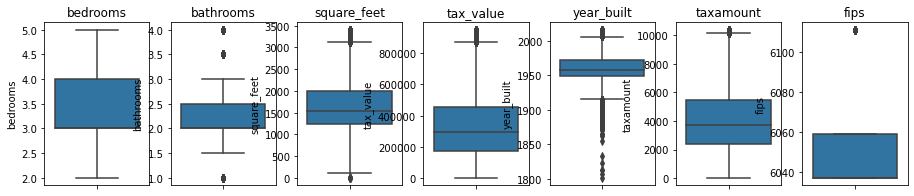

In [25]:
plt.figure(figsize=(20, 3))

# List of columns
cols = remove1.columns.to_list()

for i, col in enumerate(cols):

    # i starts at 0, but plot numbers should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,9, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    sns.boxplot(data=remove1, y=col)

    # Hide gridlines.
    plt.grid(False)


## Make function to acquire and wrangle the data

In [26]:
def wrangle_zillow_outliers(new = False):
    ''' 
    Checks to see if there is a local copy of the data, 
    if not or if new = True then go get data from Codeup database
    Then prepares the data by making feature names human readable
    and drop the nulls.
    '''
    
    if new == True:
        df = aquire_zillow_data(new == True)
    else:
        df = aquire_zillow_data()
        
    #make column names more human readable
    df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'square_feet',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built'})
    
    df = remove_outliers(df, ['bedrooms','bathrooms','square_feet', 
                                   'tax_value', 'taxamount'])
    
    df = df.dropna()
    
    return df

In [27]:
z = wrangle_zillow()

In [28]:
z.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [29]:
z.shape

(1854411, 7)

### Let's check to see if the function from my wrangle.py file works.

In [2]:
new_zillow = w.wrangle_zillow()

In [3]:
new_zillow.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [4]:
new_zillow.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedrooms     2140235 non-null  float64
 1   bathrooms    2140235 non-null  float64
 2   square_feet  2140235 non-null  float64
 3   tax_value    2140235 non-null  float64
 4   year_built   2140235 non-null  float64
 5   taxamount    2140235 non-null  float64
 6   fips         2140235 non-null  float64
dtypes: float64(7)
memory usage: 130.6 MB
